In [ ]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

# need to create token in taiga once there's access 
tc = create_taiga_client_v3()

TaigaTokenFileNotFound: No token file found. Checked the following locations: ['./.taiga-token', '/Users/kimberlyparker/.taiga/token']

In [8]:
# got data sets for airlines, airports, flights, planes, weather from nycflights data
# tyga will download and cache your data on your hardrive -- that way you can access it when you open this notebook
# to reduce storage, you can clear out your taiga cash. This won't break anything, you'll just need to get data again

## with access to broad and taiga, use code below
#airlines = tc.get(name='nycflights-2013-b1ae', version=1, file='airlines')
#airports = tc.get(name='nycflights-2013-b1ae', version=1, file='airports')
#flights = tc.get(name='nycflights-2013-b1ae', version=1, file='flights')
#planes = tc.get(name='nycflights-2013-b1ae', version=1, file='planes')
#weather = tc.get(name='nycflights-2013-b1ae', version=1, file='weather')

##for now, have access to downloaded datasets in folder
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights.csv")
planes = pd.read_csv("planes.csv")
weather = pd.read_csv("weather.csv")

In [ ]:
batting = tc.get('baseball-ac61.1/Batting')
pitching = tc.get('baseball-ac61.1/Pitching')
fielding = tc.get('baseball-ac61.1/Fielding')

In [9]:
flights['sched_dep_dt']=pd.to_datetime(flights.time_hour) + pd.to_timedelta(flights.minute,unit='m')
flights['dep_dt']=(flights.sched_dep_dt) + pd.to_timedelta(flights.dep_delay,unit='m')
# this is relevant for time-series data -- already coded by Lauren

In [10]:
arr_mins = pd.to_timedelta(flights.sched_arr_time % 10 + flights.sched_arr_time % 100,unit='m')
arr_hr = pd.to_timedelta(flights.sched_arr_time//100,unit='hour')
arr_day = flights.dep_dt.dt.floor(freq='d')
arr_dt = arr_day + arr_hr + arr_mins
flights['sched_arr_dt'] = arr_dt


In [11]:
flights.loc[flights.sched_arr_dt < flights.sched_dep_dt,'sched_arr_dt'] += pd.to_timedelta([1]*(flights.sched_arr_dt < flights.sched_dep_dt).sum(),unit='day')

In [12]:
flights['arr_dt'] = flights.sched_arr_dt + pd.to_timedelta(flights.arr_delay,unit='m')

In [13]:
flights
#this is the dataframe -- have the year (2013), departure times, delays, etc. 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


In [ ]:
flights.iloc(:S).T
#this transposes the data, we can see a dataframe with month, day, time, dep_time, dep_delay, carrier, distance, etc. 

SyntaxError: invalid syntax (4267269732.py, line 1)

In [16]:
flights.dtypes
#gives list of columns and type of data in it

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour                 object
sched_dep_dt      datetime64[ns]
dep_dt            datetime64[ns]
sched_arr_dt      datetime64[ns]
arr_dt            datetime64[ns]
dtype: object

In [17]:
#one thing important to do with big data (real data) is to look at the number of NAs
# this gives the mean of each column (so 0 would be no NAs, 1 would be all NAs, but anything else shows a fraction of null values)
# funny - more nulls in arrival time than departure time, likely there are departures listed that should be null, or plane was diverted, etc.
# 0.028 for null airtime -- interesting, why is this the same number as arrival delay but not departure delay. Why is this more than diverted arrivals?
# these are the questions to ask when you have a new dataset, what is the relationship between my columns
flights.isna().mean()

year              0.000000
month             0.000000
day               0.000000
dep_time          0.024512
sched_dep_time    0.000000
dep_delay         0.024512
arr_time          0.025872
sched_arr_time    0.000000
arr_delay         0.028001
carrier           0.000000
flight            0.000000
tailnum           0.007459
origin            0.000000
dest              0.000000
air_time          0.028001
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
sched_dep_dt      0.000000
dep_dt            0.024512
sched_arr_dt      0.024512
arr_dt            0.028001
dtype: float64

In [18]:
# number of unique values in each column
# this is a very useful metric, especially looking at metadata
# way more departure times than scheduled departure times (makes sense)
# 3 origins (greater NYC area aiports), but 105 destination airports
flights.nunique

<bound method DataFrame.nunique of         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  ...  dest air_time di

In [19]:
# this takes all the columns that can be averaged, and gives count (total values), mean, quantiles, min, max, etc.
# this is summary info -- e.g. year has 0 std (its all 2013, this makes sense)
# departure delay mean is 12, but std is 40. This is interesting -- what does it tell us about how its distributed?
# arrival delay mean is 6.9, but std is 44.6 -- we'll have a lot of outliers ("heavy tail") -- can look at percentiles to give an idea of distribution -- mean is heavily driven by outliers
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000,336776,328521,328521,327346
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100,2013-07-03 05:28:50.290994944,2013-07-03 17:42:40.203274752,2013-07-03 19:59:33.335768064,2013-07-03 20:39:13.690101760
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 07:12:00,2013-01-01 07:08:00
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000,2013-04-04 13:29:00,2013-04-05 06:38:00,2013-04-05 09:12:00,2013-04-05 08:00:00
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000,2013-07-03 10:30:00,2013-07-04 09:29:00,2013-07-04 12:04:00,2013-07-04 12:01:30
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000,2013-10-01 07:00:00,2013-10-01 16:38:00,2013-10-01 19:00:00,2013-10-01 20:14:45
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,2013-12-31 23:59:00,2014-01-01 00:26:00,2014-01-01 23:56:00,2014-01-02 01:32:00
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846,NaN,NaN,NaN,NaN


In [20]:
#basic plotting
# flights_nc are no cancellations
# isna gives a true or false value (true if it's a nulll departure time)
# this is saying true if either of these is null
# we are using the ~ to invert, so we will be removing all the flights with nulls in departure or arrival
# this is shorthand (not defining .loc or rows), and it does the same thing:
# flights_nc = flights[~(flights.dep_time.isna() | flights.arr_time.isna())]
flights_nc = flights.loc[~(flights.dep_time.isna() | flights.arr_time.isna()),:]
flights_nc

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,SYR,41.0,209,22,45,2013-09-30 22:00:00,2013-09-30 22:45:00,2013-09-30 22:40:00,2013-09-30 23:52:00,2013-09-30 23:35:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,BUF,52.0,301,22,50,2013-09-30 22:00:00,2013-09-30 22:50:00,2013-09-30 22:40:00,2013-10-01 00:14:00,2013-09-30 23:54:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,ROC,47.0,264,22,46,2013-09-30 22:00:00,2013-09-30 22:46:00,2013-09-30 22:41:00,2013-10-01 00:02:00,2013-09-30 23:46:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,BOS,33.0,187,22,55,2013-09-30 22:00:00,2013-09-30 22:55:00,2013-09-30 23:07:00,2013-10-01 00:06:00,2013-10-01 00:07:00


Text(0, 0.5, 'excess arrival delay')

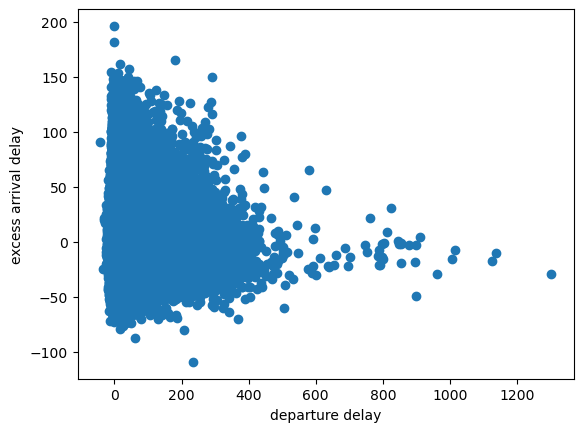

In [21]:
#do some plotting of the departure delays and the arrival delays
# arrival is subtracted from departure because otherwise arrival delay is never shorter than departure delay, this would be more linear if you don't subtract 

plt.scatter(flights_nc.dep_delay,flights_nc.arr_delay - flights_nc.dep_delay)
plt.xlabel('departure delay')
plt.ylabel('excess arrival delay')


In [22]:
# grouping -- very common when you have categorical and numerical axes
# perform certain actions across a subset of our data -- example
flights_nc.groupby('origin').dep_delay.mean
#this gives a series with indexes drawn from the distinct origin
# specifically, mean of departure delay specific to each airport (EWR, JFK, LGA)
# the average shows increased average in EWR

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x17251d810>>

In [23]:
# same but look at std rather than mean
# we see largest std in EWR, so it's likely skewed by outliers
flights_nc.groupby('origin').dep_delay.std

<bound method GroupBy.std of <pandas.core.groupby.generic.SeriesGroupBy object at 0x168a3b2d0>>

In [24]:
# objects created with groupby below -- good for summary data, less clear for visualization
flights_nc.groupby('origin')

In [25]:
# can create object
dfg_flights_nc = flights_nc.groupby('origin')

In [26]:
# can use this object to get summary data
dfg_flights_nc.dep_delay.mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x173745810>>

In [ ]:
flights_nc.sortvalues('origin').iloc[:,:14]
#error -- find code for this

AttributeError: 'DataFrame' object has no attribute 'sortvalues'

In [28]:
# group by arrival to find delay mean for each arrival destination
flights_nc.groupby('dest').dep_delay.mean().sort_values()

dest
LEX    -9.000000
PSP    -2.944444
EYW     3.647059
STT     4.613900
XNA     6.362189
         ...    
TYS    28.382353
BHM    29.014870
OKC    29.853583
CAE    33.811321
TUL    34.784512
Name: dep_delay, Length: 104, dtype: float64

In [29]:
# same for standard deviation
# LEX has a std of NA, why?
flights_nc.groupby('dest').dep_delay.std().sort_values()

dest
PSP     5.945559
EYW    13.200100
HDN    17.215505
SNA    22.566766
ANC    25.592619
         ...    
TVC    55.640910
BHM    56.071248
CAK    57.214617
HNL    57.925586
LEX          NaN
Name: dep_delay, Length: 104, dtype: float64

In [30]:
# because there is only one flight there
flights_nc[flights_nc.dest == 'LEX']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
77948,2013,11,24,2026.0,2035,-9.0,2227.0,2249,-22.0,9E,...,LEX,90.0,604,20,35,2013-11-24 20:00:00,2013-11-24 20:35:00,2013-11-24 20:26:00,2013-11-24 22:58:00,2013-11-24 22:36:00


Text(0, 0.5, 'destination delay departure std')

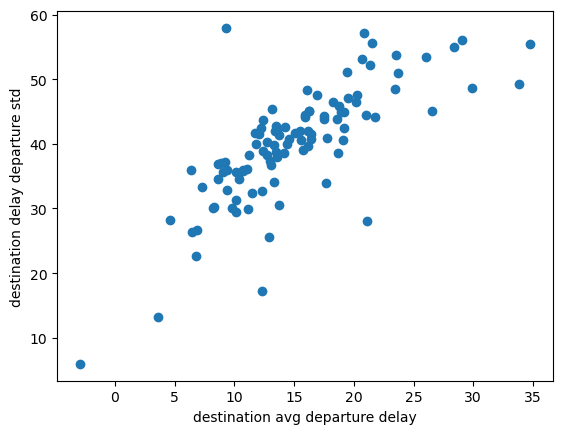

In [31]:
# make a scatterplot showing the average departure delay and the std departure delay by destination
# can see how lopsided this dataset is, maybe we can look at correlation next
plt.scatter(flights_nc.groupby('dest').dep_delay.mean(),
            flights_nc.groupby('dest').dep_delay.std())
plt.xlabel('destination avg departure delay')
plt.ylabel('destination delay departure std')

In [32]:
# looking at correlation
# the departure delay has been aggregated by both mean and std by destination airport
# this is the dataset above, but now we have it as an aggregated object
# seaborn likes dataframes, so this makes it easier to plot as a series
dfg_dest = flights_nc.groupby('dest')
dfg_dest.agg({'dep_delay':['mean','std']})

dep_delay           
           mean        std
dest                      
ABQ   13.740157  30.526011
ACK    6.456604  26.320270
ALB   23.447368  48.486180
ANC   12.875000  25.592619
ATL   12.443904  43.752597
...         ...        ...
TPA   12.109130  41.531693
TUL   34.784512  55.427034
TVC   21.536842  55.640910
TYS   28.382353  55.012280
XNA    6.362189  35.901705

[104 rows x 2 columns]

In [40]:
# gives correlation matrix between mean and std
# get 0.757 pearson r correlation between mean and std
dfg_dest.agg({'dep_delay':['mean','std']}).corr()

dep_delay          
                    mean       std
dep_delay mean  1.000000  0.757348
          std   0.757348  1.000000

In [34]:
# custom function (apply) -- lambda function
# lambda functions are python's way of writing a function very efficiently in one line
# only use lambda for one line functions

testfun = lambda x: x + x
testfun(2)

4

In [35]:
# use this lambda to do distance over air time -- average of plane velocity stratified by destination airport
# use apply to apply this lambda function
# this gives an output with mean and std velocity per destination
# can do ttests to look at differences in velocity between destination aiports

dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std']))

/var/folders/rk/s463hwp930v1g8k4cz9fsfj80000gn/T/ipykernel_1683/2472092880.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std']))


,mean,std
dest,,
ABQ,7.370106,0.544402
ACK,4.815894,0.509358
ALB,4.538350,0.415422
ANC,8.166432,0.292883
ATL,6.753035,0.566571
...,...,...
TPA,6.984943,0.521179
TUL,6.873666,0.624483
TVC,6.901976,0.449430


In [36]:
# look at correlation between mean and std for this velocity dataset
dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])).corr()

/var/folders/rk/s463hwp930v1g8k4cz9fsfj80000gn/T/ipykernel_1683/284727237.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])).corr()


,mean,std
mean,1.000000,-0.223107
std,-0.223107,1.000000


In [41]:
# question -- what is the object created by groupby() function?
# it is likely using a reference of the original dataframe, not creating a copy of the data
# can look around more at the object to see how it groups differently than df, but has the same info
dfg_dest.groups

{'ABQ': [27881, 28867, 29830, 30848, 31579, 32436, 33314, 34410, 35366, 36326, 37307, 38086, 38933, 39916, 40960, 41860, 42859, 43839, 44588, 45450, 46430, 47417, 48382, 49387, 50344, 51087, 51942, 52927, 53906, 54874, 55804, 56729, 57514, 58376, 59351, 60320, 61287, 62239, 63252, 64035, 64855, 65856, 66828, 67811, 68799, 69781, 70552, 71340, 72357, 73359, 74323, 75334, 76327, 77114, 77927, 78916, 79883, 80845, 81623, 82253, 83061, 84021, 85045, 86041, 87002, 87791, 88855, 89660, 90448, 91393, 92231, 93349, 94313, 95284, 95937, 96855, 97816, 98732, 99735, 100722, 101651, 102501, 103360, 104342, 105167, 105881, 106777, 107753, 108570, 109421, 110407, 111229, 185558, 186716, 187700, 188693, 189680, 190500, 191383, 192361, ...], 'ACK': [27377, 28354, 29331, 30090, 30318, 31242, 31725, 31929, 32697, 32939, 33946, 34868, 35849, 36622, 36834, 37761, 38241, 38442, 39184, 39417, 43350, 44956, 49862, 207754, 208732, 209699, 210405, 211367, 212357, 213371, 214143, 214310, 215048, 215254, 216006,

In [42]:
# see if any planes are poor performers
# note we're putting in strings, but we can put in a function that takes in a series and outputs a single float in the same area ('nean', 'std', etc.)
# the aggregation function parses the dictionary input -- the keys in the dict should refer to the columns in a df
# look at pandas documentation, and search agg to get an idea of what the input and parameters are

df_tail_agg = flights_nc.groupby('tailnum').agg({'arr_delay':['mean','std','count']})
df_tail_agg.corr()

arr_delay                    
                     mean       std     count
arr_delay mean   1.000000  0.733224 -0.010966
          std    0.733224  1.000000  0.077598
          count -0.010966  0.077598  1.000000

In [43]:
# what destinations have the most carriers?
# we are grouping by destination, we are looking at carrier entry, only getting unique carriers, and sorting to look at top destinations, and only looking at the top 20
# the output number is the number of unique carriers (delta, etc) for each destination
flights_nc.groupby('dest').carrier.nunique().sort_values(ascending=False).iloc[:20]

dest
ORD    7
CLT    7
ATL    7
BOS    7
TPA    7
DTW    6
PIT    6
STL    6
DCA    6
AUS    6
MSY    6
MSP    6
IAD    6
SFO    5
RDU    5
CLE    5
PHX    5
SEA    5
DEN    5
PHL    5
Name: carrier, dtype: int64

In [44]:
# can plot directly using .hist
# we'll go into more detail later to find out how to make these prettier
flights_nc.groupby('dest').carrier.nunique().hist

<bound method hist_series of dest
ABQ    1
ACK    1
ALB    1
ANC    1
ATL    7
      ..
TPA    7
TUL    1
TVC    2
TYS    2
XNA    2
Name: carrier, Length: 104, dtype: int64>

Text(0, 0.5, 'count')

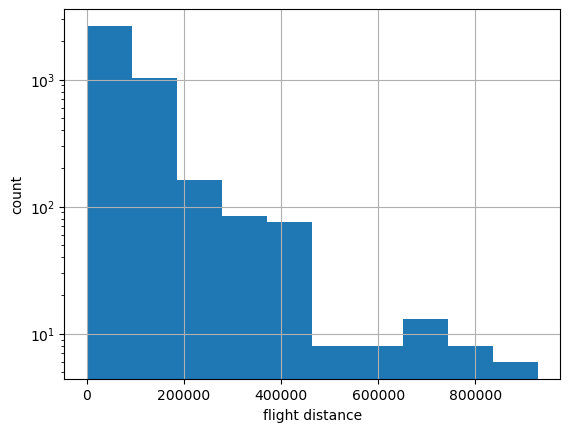

In [45]:
# what is the distribution of plane mileage
# grouping by plane type with tailnum -- and can see the distance summary
# there's a big variance in the y scale of our data, so we can add plt.yscale('log') below it to log scale
flights_nc.groupby('tailnum').distance.sum().hist()
plt.yscale('log')
plt.xlabel('flight distance')
plt.ylabel('count')

In [46]:
# can use the dt attribute of a daytime column, and extract specifics (day, month, hour, etc.)
# this is the flights that were schedule within the first 4 hours of the day (hour goes from 0-24)
# the dep_dt column has fancy objects with time information, which can be extracted like below


flights_nc[flights_nc.dep_dt.dt.hour < 5]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
842,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,...,SJU,189.0,1598,23,59,2013-01-02 23:00:00,2013-01-02 23:59:00,2013-01-03 00:42:00,2013-01-03 04:44:00,2013-01-03 05:20:00
843,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,...,SYR,49.0,209,22,50,2013-01-02 22:00:00,2013-01-02 22:50:00,2013-01-03 01:26:00,2013-01-04 00:08:00,2013-01-04 02:42:00
844,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,...,CLT,108.0,529,5,0,2013-01-02 05:00:00,2013-01-02 05:00:00,2013-01-02 04:58:00,2013-01-02 06:50:00,2013-01-02 07:03:00
1785,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,...,SJU,193.0,1598,23,59,2013-01-03 23:00:00,2013-01-03 23:59:00,2013-01-04 00:32:00,2013-01-04 04:44:00,2013-01-04 05:06:00
1786,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,...,BUF,58.0,301,21,45,2013-01-03 21:00:00,2013-01-03 21:45:00,2013-01-04 00:50:00,2013-01-04 23:12:00,2013-01-05 02:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331219,2013,9,25,451.0,500,-9.0,636.0,648,-12.0,US,...,CLT,84.0,529,5,0,2013-09-25 05:00:00,2013-09-25 05:00:00,2013-09-25 04:51:00,2013-09-25 06:56:00,2013-09-25 06:44:00
332195,2013,9,26,451.0,500,-9.0,619.0,648,-29.0,US,...,CLT,72.0,529,5,0,2013-09-26 05:00:00,2013-09-26 05:00:00,2013-09-26 04:51:00,2013-09-26 06:56:00,2013-09-26 06:27:00
333191,2013,9,27,453.0,500,-7.0,627.0,648,-21.0,US,...,CLT,76.0,529,5,0,2013-09-27 05:00:00,2013-09-27 05:00:00,2013-09-27 04:53:00,2013-09-27 06:56:00,2013-09-27 06:35:00
334187,2013,9,28,451.0,500,-9.0,627.0,648,-21.0,US,...,CLT,77.0,529,5,0,2013-09-28 05:00:00,2013-09-28 05:00:00,2013-09-28 04:51:00,2013-09-28 06:56:00,2013-09-28 06:35:00


## Exercises
Let's do some exercises

- Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the average delay?
- Which carrier has the worst delays? Challenge: can you detangle the effects of airports vs. bad carriers? why/why not? (hint: grouping by carrier and dest at the same time!)
- Count and nunique are common ways of looking at a dataset. When do you use one vs the other?
- Of one that has a null value in departure and arrivals, how do they subset? Do they match?

In [ ]:
# Let's start with the first bullet first
# define a canceled flight
# we are assuming currently that canceled flights are null for both arrival and departure -- what does this subset look like?
flights_c = flights.loc[(flights.dep_time.isna() | flights.arr_time.isna()),:]
flights_c


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,...,OKC,NaN,1325,19,30,2013-01-01 19:00:00,2013-01-01 19:30:00,2013-01-01 20:16:00,2013-01-01 22:20:00,NaT
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,...,RDU,NaN,416,16,30,2013-01-01 16:00:00,2013-01-01 16:30:00,NaT,NaT,NaT
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,...,DFW,NaN,1389,19,35,2013-01-01 19:00:00,2013-01-01 19:35:00,NaT,NaT,NaT
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,...,MIA,NaN,1096,15,0,2013-01-01 15:00:00,2013-01-01 15:00:00,NaT,NaT,NaT
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,...,FLL,NaN,1069,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


Text(0, 0.5, 'count')

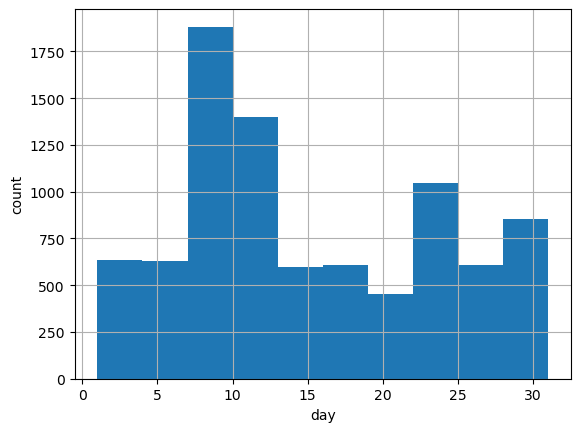

In [ ]:
## MY WORK
# now we have a "canceled" flights -- this can be better defines
# look at the histogram distribution of "canceled" flights per day
flights_c.day.hist()
plt.xlabel('day')
plt.ylabel('count')


In [ ]:

# try to group by both day and month -- so we have each individual day in a year
flights_c_day = flights_c.groupby(['day', 'month'])

flights_c_day.dep_delay.mean()

day  month
1    1        46.0
     2         0.0
     3         NaN
     4         NaN
     5        -4.0
              ... 
31   5        30.6
     7         NaN
     8        -1.0
     10        0.0
     12        NaN
Name: dep_delay, Length: 359, dtype: float64

<Axes: >

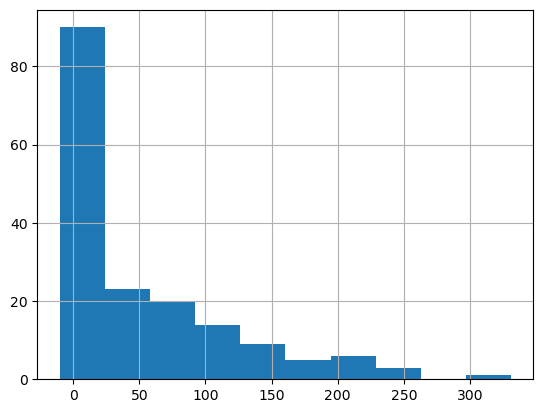

In [ ]:
## MY WORK
# this isn't quite right - but I feel like I'm on the right track
flights_c_day.dep_delay.mean().hist()

In [ ]:
## MY WORK
# are the null values in a departure matching with null values in arrivals?
# can we have a true/false statement to determine how many of the NAs in departure match with Nas in arrivals?

print(flights_c.dep_time == flights_c.arr_time)


754       False
838       False
839       False
840       False
841       False
          ...  
336771    False
336772    False
336773    False
336774    False
336775    False
Length: 8713, dtype: bool


In [60]:
# Back to the group
# average delay of flights that were completed by day

dfg_day = flights.groupby(['day', 'month'])
dfg_day.dep_delay.mean()

day  month
1    1        11.548926
     2        10.852909
     3        11.015890
     4        12.421436
     5         2.903427
                ...    
31   5         9.274227
     7         6.280843
     8         4.587278
     10        5.163577
     12        6.996053
Name: dep_delay, Length: 365, dtype: float64

In [61]:
# now let's get the isna using the apply function

dfg_day.arr_time.apply(lambda x: x.isna().sum())

day  month
1    1         5
     2        16
     3        14
     4         9
     5         2
              ..
31   5        21
     7         4
     8         5
     10        6
     12       16
Name: arr_time, Length: 365, dtype: int64

In [62]:
dfg_day.arr_time.apply(lambda x: x.isna().mean())

day  month
1    1        0.005938
     2        0.017279
     3        0.014614
     4        0.009278
     5        0.002075
                ...   
31   5        0.021298
     7        0.003996
     8        0.007353
     10       0.006508
     12       0.020619
Name: arr_time, Length: 365, dtype: float64

In [67]:
# taking the departure time, saying isna for departure time, and taking mean of departure times for a given day of the year
dfg_day.agg({'dep_delay':'mean','arr_time':lambda x: x.isna().mean()})

dep_delay  arr_time
day month                     
1   1      11.548926  0.005938
    2      10.852909  0.017279
    3      11.015890  0.014614
    4      12.421436  0.009278
    5       2.903427  0.002075
...              ...       ...
31  5       9.274227  0.021298
    7       6.280843  0.003996
    8       4.587278  0.007353
    10      5.163577  0.006508
    12      6.996053  0.020619

[365 rows x 2 columns]

In [68]:
dfg_day.agg({'dep_delay':'mean','arr_time':lambda x: x.isna().mean()}).corr()

,dep_delay,arr_time
dep_delay,1.000000,0.568053
arr_time,0.568053,1.000000


In [69]:
flights[(flights.day ==1) & (flights.month == 1)].dep_time.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
837    False
838     True
839     True
840     True
841     True
Name: dep_time, Length: 842, dtype: bool

## Joins and Merges
Example of a case where there are different sets of metadata 
We want to be able to match these to an original metadata for a dataset


In [75]:
# small subset of the flights data

df_flights_small = flights[['sched_dep_dt','dep_dt','sched_arr_dt',
                            'arr_dt','origin','dest','tailnum', 'carrier']]
df_flights_small

,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,dest,tailnum,carrier
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,IAH,N14228,UA
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,IAH,N24211,UA
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,MIA,N619AA,AA
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,BQN,N804JB,B6
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,ATL,N668DN,DL
...,...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,DCA,NaN,9E
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,SYR,NaN,9E
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,BNA,N535MQ,MQ
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,CLE,N511MQ,MQ


In [ ]:
# look at airlines
# the carrier codes in the df above match the carrier codes and names below
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [ ]:
# now we want to have the df with the long names of the airlines
# we need to match the carrier codes and names using merge

df_flights_small.merge(airlines, left_on='carrier', right_on='carrier')

#mini challenge -- do these airlines have high cancellation rates?

,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,dest,tailnum,carrier,name
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,IAH,N14228,UA,United Air Lines Inc.
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,IAH,N24211,UA,United Air Lines Inc.
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,MIA,N619AA,AA,American Airlines Inc.
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,BQN,N804JB,B6,JetBlue Airways
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,ATL,N668DN,DL,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,DCA,NaN,9E,Endeavor Air Inc.
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,SYR,NaN,9E,Endeavor Air Inc.
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,BNA,N535MQ,MQ,Envoy Air
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,CLE,N511MQ,MQ,Envoy Air


Some terminology for this example above:

For the airline df, this is a primary key. So the carrier functions essentially as an index for this variable.

When carrier shows up in another table (like the df_flights_small), it is a foreign key. The dataframe has a separate set of unique identifiers. The foreign key of carrier can be used to append the carrier name.

A lot of times, it is on the user to check that the primary key is a good primary key. See how to check this below.

In [78]:
# check the primary key length matches the number of unique carrier values
len(airlines) == airlines.carrier.nunique()

True

In [86]:
# for this random df, it is important to have a null-able integer type
# normal numpy arrays don't let you have nulls in them, that's the default, so we're defining a nullable integer type with Int64
df1 = pd.DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'data1' : pd.Series(range(7), dtype='Int64')})

df2 = pd.DataFrame({'key':['a', 'b', 'd'],
                   'data2' : pd.Series(range(3), dtype='Int64')})

In [87]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [88]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [90]:
# now we'll merge them

pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [ ]:
# better to describe the exact columns you are merging on
# even though the results are the same, this is useful for others looking at code and to be specific
pd.merge(df1,df2,on='key')

# same way to do it with more specific code:
# pd.merge(df1,df2,left_on='key',right_on='key')
# you can do this with different names in the columns to merge, it'll just add extra columns

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [ ]:
# The above is an inner join
# Now we are doing an outer join -- this will introduce nulls, and keeps the keys unique to each individual table
# This has taken the union of all the keys
# the missing data from one table to another introduces nulls
# you need to determine if this is what you want for the specific application

pd.merge(df1,df2,on="key",how='outer')

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


In [ ]:
# right join includes all the values from the df2 (listed second)
pd.merge(df1,df2,on="key",how='right')

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,d,<NA>,2


In [99]:
# left join includes all the values from the df1 (listed first)
# we keep all the keys on the left df
pd.merge(df1,df2,on="key",how='left')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,c,3,<NA>
4,a,4,0
5,a,5,0
6,b,6,1


In [ ]:
# merging with different column names of key, we do an outer so it keeps everyhting and includes both key columns
pd.merge(df1,df2.rename(columns={'key':'right_key'}),
         left_on='key', right_on='right_key',how='outer')

,key,data1,right_key,data2
0,a,2,a,0
1,a,4,a,0
2,a,5,a,0
3,b,0,b,1
4,b,1,b,1
5,b,6,b,1
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [101]:
# you can merge on multiple keys as a combined key

left = pd.DataFrame({'key1':['foo', 'foo', 'bar'],
                     'key2':['one','two','one'],
                     'lval':pd.Series([1,2,3],dtype='Int64')})

right = pd.DataFrame({'key1':['foo', 'foo', 'bar','foo'],
                     'key2':['one','one','one', 'two'],
                     'rval':pd.Series([4,5,6,7],dtype='Int64')})

In [ ]:
# merging on multiple keys

pd.merge(left,right,on=['key1','key2'],how='outer')

# can also use indices as keys in various ways
# recommend to look at the textbook linked from day 1 slides -- specifically the merge and join sections
# hazards to deal with: knowing to avoid duplication of data, knowing which keys and merge types to use
# if you're not careful to ensure the keys are unique, it will cause MANY downstream problems

,key1,key2,lval,rval
0,bar,one,3,6
1,foo,one,1,4
2,foo,one,1,5
3,foo,two,2,7


In [ ]:
# check for duplicates
# it is not the case that there are no duplicates
right[['key1','key2']].duplicated().any()

np.True_

In [ ]:
# check for duplicates
# check to see if all are duplicated which is not true for this dataset
right[['key1','key2']].duplicated().all()

np.False_